**3.** El dataset churn.csv contiene registros de clientes de un banco, se peretende que las características que tienen los clientes se puedan calcular de que estos cancelen sus cuentas:

• RowNumber: número de registro.

• CustomerId: identificador del cliente.

• Surname: apellido del cliente.

• CreditScore: score crediticio.

• Geography: país de origen.

• Gender: género del cliente. 

• Age: edad del cliente.

• Tenure: tenencia 1 sí, 0 no.

• Balance: saldo de la cuenta.

• NumOfProducts: número de productos contratados. 

• HasCrCard: tenencia de alguna tarjeta de crédito 1 sí, 0 no.

• IsActiveMember: ha tenido actividad en el último periodo.

• EstimatedSalary: salario estimado.

• Exited: Indica si el cliente se fugó (canceló su contrato) 1 sí, 0 no. Esta es la variable objetivo.

a) Realizar el tratamiento de datos: Aunque el número de productos es una variable numérica echando
un vistazo a los valores dentro de la columna se observa que el valor más alto que alcanza es de 4 con
muy pocos casos, seguido del valor tres de igual forma con pocos casos. Por lo anterior, esta variable se
convierte en una categórica de modo que si tiene menos de dos productos la convierte cadena de texto
y si tiene 3 o más entonces se le asigna un valor de +3. Posteriormente, se recuentan los valores de la
columna. Finalmente separamos las variables a usar en el modelo entre categóricas y numéricas.

b) Centre las variables numéricas, realice un boxplot observe que las variables están en diferentes rangos,
incluso que las columnas de Balance y Estimated Salary además de tener rangos demasiado altos tienen
presencia de outliers. Use un un escalador (el que a su criterio sea el mejor) para normalizar los datos de
las variables numéricas y almacenamos las columnas en un DataFrame nuevo y finalmente verifique con
un boxplot para verificar que se ha corregido el problema de los rangos.

c) Como las variables categóricas están en formato cadena de texto usar un codificador (OneHotEncoding)
para obtener una matriz o tabla indicadora en la cual se presentan todos los atributos categóricos de modo
que si alguna característica está presente ésta se marca con 1 y 0 en caso contrario, aplicar esto a todas las
variables categóricas. Luego realice el join de ambas tablas junto con las llaves primarias de la original la
variable objetivo, esta nueva tabla se usara posteriormente para otra practica.

https://scikit-learn.org/stable/modules/preprocessing.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html






**SOLUCIÓN**

**a)** 

A continuación se muestran los primeros 10 observaciones de la base de datos y las variables que contiene. 

In [1]:
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import numpy as np

pd.set_option('max_colwidth',100)
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [26]:
churnPath = 'DataSets/churn.csv'
churn_df = pd.read_csv(churnPath)
churn_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


A continuación presentamos la misma base de datos con una variable adicional para el número de productos modificada en una variable categórica, donde si tiene menos de dos productos la convierte cadena de texto y si tiene 3 o más entonces se le asigna un valor de +3. Además, declararemos como factor a otras variables como Gender, HasCrCard, IsActiveMember y Exited. 

In [27]:
churn_df['NumProd']=churn_df['NumOfProducts']
churn_df['NumProd'].replace(3, '+3', inplace=True)
churn_df['NumProd'].replace(4, '+3', inplace=True)
churn_df['NumProd']= churn_df['NumProd'].astype("category")
churn_df['Gender']= churn_df['Gender'].astype("category")
churn_df['HasCrCard']= churn_df['HasCrCard'].astype("category")
churn_df['IsActiveMember']= churn_df['IsActiveMember'].astype("category")
churn_df['Exited']= churn_df['Exited'].astype("category")
churn_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NumProd
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,+3
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,2
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,2
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,2
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,+3
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,2
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,1


In [28]:
print("Número de elementos por cada categoría de Numero de Productos")
print(churn_df['NumProd'].value_counts())

Número de elementos por cada categoría de Numero de Productos
1     5084
2     4590
+3     326
Name: NumProd, dtype: int64


In [29]:
print("Tipos de las variables de la base de datos")
churn_df.dtypes

Tipos de las variables de la base de datos


RowNumber             int64
CustomerId            int64
Surname              object
CreditScore           int64
Geography            object
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
NumProd            category
dtype: object

**b)**

Se presentan los BoxPlot de algunas de las variables numéricas. 

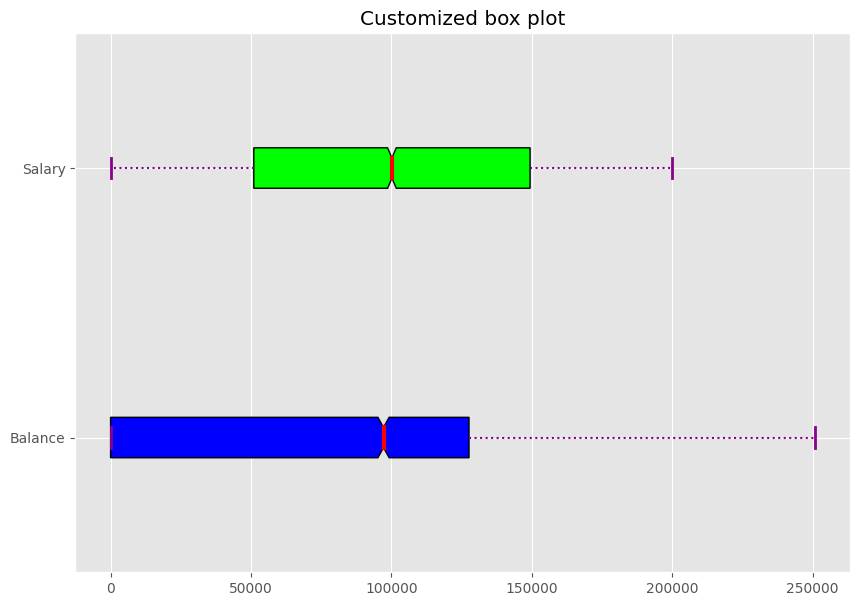

In [38]:
# Creating dataset
np.random.seed(10)
Balance = churn_df['Balance']
Salary = churn_df['EstimatedSalary']



data = [Balance, Salary]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['#0000FF', '#00FF00']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['Balance', 'Salary'])
 
# Adding title 
plt.title("Customized box plot")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

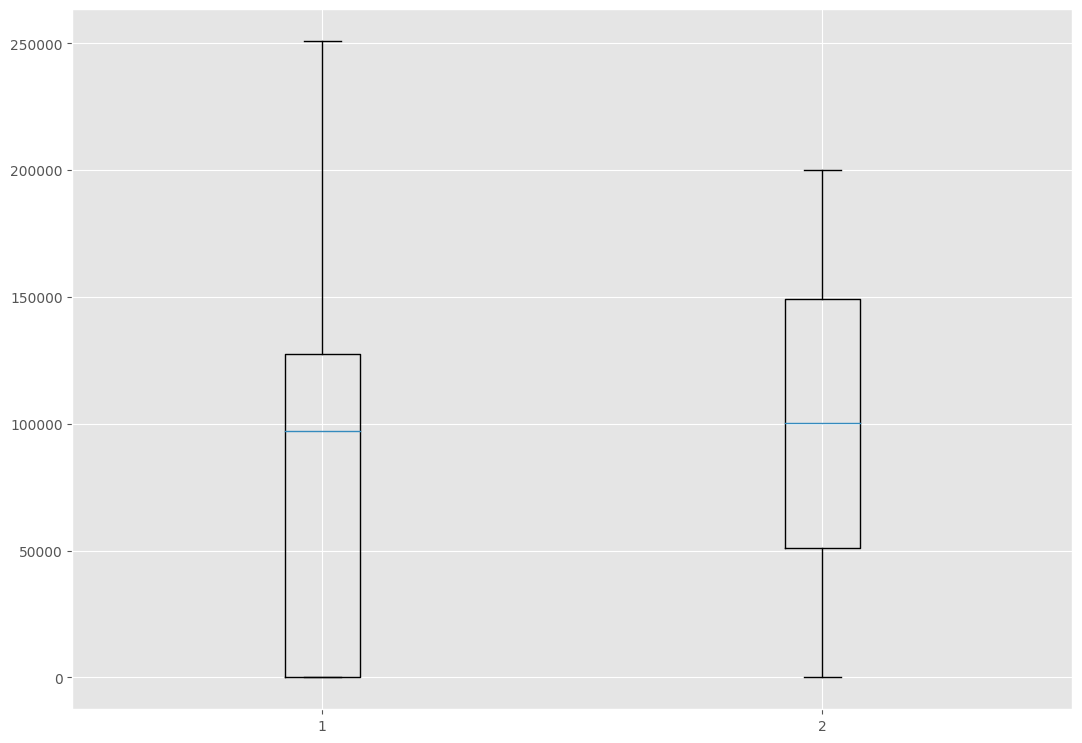

In [42]:
#  dataset

Balance = churn_df['Balance']
Salary = churn_df['EstimatedSalary']


data = [Balance, Salary]


fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0,1, 1])

# Creating plot
bp = ax.boxplot(data)

# show plot
plt.show()
